<a href="https://colab.research.google.com/github/KunalAyush1/CS229_learning/blob/main/Softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Softmax_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X , Y):
    self.m, self.n = X.shape
    self.k = len(np.unique(Y))
    self.w = np.zeros((self.k, self.n))
    #one-hot encoding for classification
    y_onehot = np.zeros((self.m, self.k))
    y_onehot[np.arange(self.m), Y] = 1

    #### basically what does this one-hot encoding is doing is making a matrix of m rows and k columns...each row represents a training example and
    ### the class which is true is set to 1 in column(k) and rest are zero for vector computations


    for i in range(self.no_of_iterations):
      Z = np.dot(X, self.w.T)
      Y_hat = self.softmax(Z)
      error = Y_hat - y_onehot
      dw = np.dot(error.T, X) / self.m
      self.w -= self.learning_rate * dw

  def softmax(self, Z):
    Z_stable = Z  - np.max(Z, axis = 1 , keepdims = True) ### max is subtracted to stabilise
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis = 1, keepdims = True)

  def predict(self,X):
    Z = np.dot(X, self.w.T)
    Y_pred = np.argmax(self.softmax(Z), axis = 1)
    return Y_pred

In [16]:

## visualization of softmax


logits = np.array([
    [2.0, 1.0, 0.5],
    [1.0, 3.0, 0.2],
    [0.2, 0.5, 2.0],
    [2.0, 2.0, 2.0],
    [3.0, 1.0, 0.5]
])

def softmnax(z):
  z_stable = z - np.max(z , axis = 1 , keepdims=True)
  exp_z = np.exp(z_stable)
  return exp_z/np.sum(exp_z, axis = 1, keepdims = True)

probs = softmnax(logits)
print(probs)

[[0.62853172 0.2312239  0.14024438]
 [0.11314284 0.8360188  0.05083836]
 [0.11905462 0.16070692 0.72023846]
 [0.33333333 0.33333333 0.33333333]
 [0.82140902 0.11116562 0.06742536]]


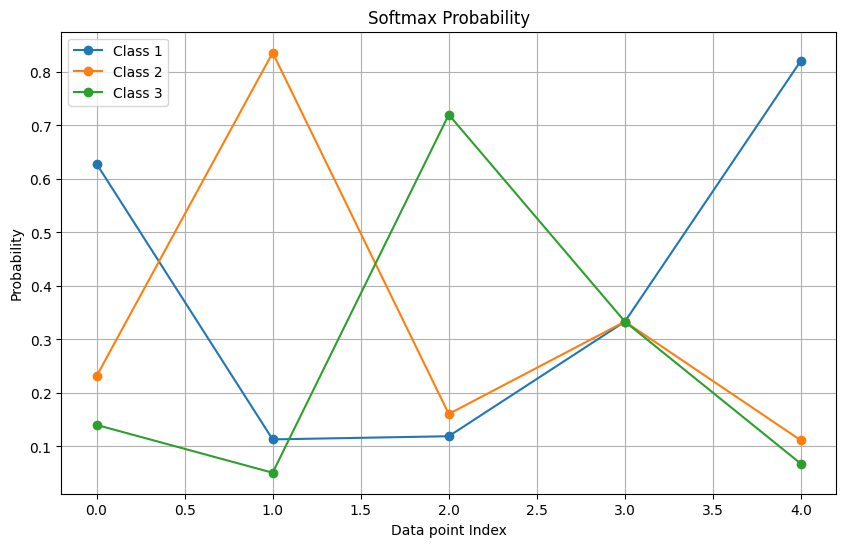

In [19]:
x = np.arange(probs.shape[0])

plt.figure(figsize=(10,6))

for class_idx in range(probs.shape[1]):
  plt.plot(x, probs[:, class_idx], marker='o' ,label=f'Class {class_idx + 1}')

plt.title('Softmax Probability')
plt.xlabel("Data point Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()